# Exploratory Data Analysis

Exploratory Data Analysis is used to get an insight into the type of data. In this project, we have data in form of images. 

1. Analysis the extension of files and their quantity to get a glimpse into the computational time required to extract the pixels features.
2. Exploration the types of dimensions of the images.
3. Analysis of the Class Distributions.
4. Analysis of the structures of the images through mean images of each class.

Since, we have a images with a lot of pixels, we perform a Principal Component Analysis(PCA) after the Standardization of the dataset. We encode the target variable(i.e. a categorical variable) using Label Encoding and One-hot Encoding both separately.

Finally, we split the dataset into train, test and validation datasets.

# Importing the required modules

In [1]:
# Modules for data handling and visualisation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules for accessing the directories.
import os

# Modules for image displaying
from skimage.io import imshow
from PIL import Image

# Modules for Standardization and Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Modules for Principal Component Analysis
from sklearn.decomposition import PCA

# Setting the plot styles

In [2]:
sns.set_theme()

# File Directory Analysis

In [3]:
def getExtension(fileName):
    return os.path.splitext(fileName)[1]

In [4]:
def files(celltype):
 folder = os.path.join(r"../data/Blood Cells",celltype)
 extensions = list(map(getExtension,os.listdir(folder)))
 return extensions
        

In [5]:
classes = ["basophil","neutrophil","eosinophil","monocyte","lymphocyte","ig","erythroblast","platelet"]
fileExtensions = []

In [6]:
for i in classes:
    fileExtensions += files(i)

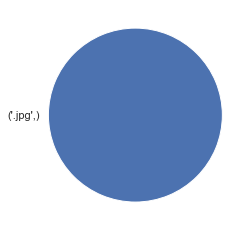

In [7]:
x = pd.DataFrame(fileExtensions).value_counts()
plt.pie(dict(x).values(),labels=dict(x).keys())
plt.show()

This implies that all the files are of the same extension (i.e. ".jpg") among all the directories of classes.

# Image Dimension Analysis

In [11]:
def getDimensions(celltype):
    folder = os.path.join(r"../data/Blood Cells",celltype)
    imgDim = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        imgDim.append(img.size)
    return imgDim

In [12]:
fileDims = []

In [13]:
for i in classes:
    fileDims += getDimensions(i)

In [14]:
x

.jpg    17092
dtype: int64

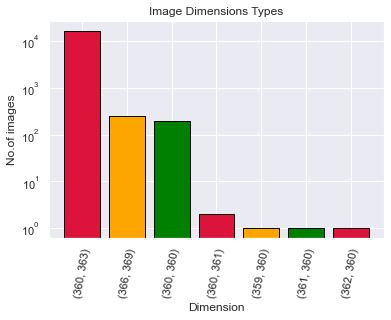

In [15]:
x = pd.DataFrame(fileDims).value_counts()
plt.bar(list(map(str,dict(x).keys())),dict(x).values(),color=["crimson","orange","green"],edgecolor="black",log=True)
plt.title("Image Dimensions Types")
plt.xlabel("Dimension")
plt.ylabel("No.of images")
plt.xticks(rotation=80)
plt.show()

# Reading the dataset

In [ ]:
import chardet
with open("../../dataset_grayscale.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000000))
result

In [22]:
cells = pd.read_csv(r"../../dataset_grayscale.csv", encoding="ascii")

UnicodeDecodeError: 'ascii' codec can't decode byte 0xae in position 229376: ordinal not in range(128)

In [16]:
cells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17099 entries, 0 to 17098
Columns: 7227 entries, Unnamed: 0 to cellType
dtypes: float64(7226), object(1)
memory usage: 942.8+ MB


In [17]:
cells = cells.drop(["Unnamed: 0"],axis = 1)

# Class Distribution

In [18]:
classCount = cells["cellType"].value_counts()
del classCount["cellType"]

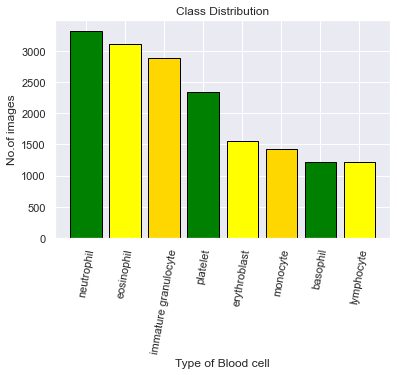

In [19]:
plt.bar(dict(classCount).keys(),dict(classCount).values(),color=["green","yellow","gold"],edgecolor="black")
plt.title("Class Distribution")
plt.xlabel("Type of Blood cell")
plt.ylabel("No.of images")
plt.xticks(rotation=80)
plt.show()

The bar chart clearly depicts that the dataset we have obtain is slightly biased.

# Mean images of each class

In [20]:
cells.drop(cells[(cells['cellType'] == "cellType")].index, inplace=True)

In [21]:
avgImgs = cells.groupby("cellType")[[str(i) for i in range(0,7225)]].mean()

In [22]:
indices = list(avgImgs.index)

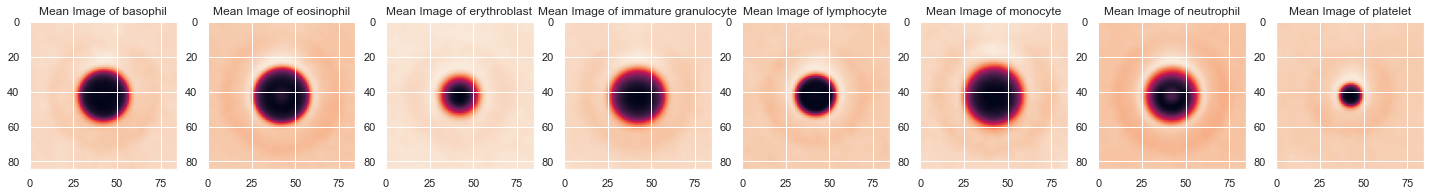

In [23]:
f, ax = plt.subplots(1,8,figsize=(25,25))
for i in range(len(indices)):
    img = np.reshape(np.array(avgImgs.loc[indices[i]]),(85,85))
    ax[i].imshow(img)
    ax[i].set_title("Mean Image of "+indices[i])
plt.show()

# Standardization of data

In [24]:
scaler = StandardScaler()

In [25]:
scaled = scaler.fit_transform(cells[[str(i) for i in range(0,7225)]])

In [26]:
cells_scaled = pd.DataFrame(scaled).join(cells["cellType"])

In [27]:
cells_scaled

,0,1,2,3,4,5,6,7,8,9,...,7216,7217,7218,7219,7220,7221,7222,7223,7224,cellType
0,0.834478,0.736110,0.573790,0.275594,-0.232871,-0.667440,-0.879175,-0.887755,-0.512532,0.427380,...,0.819870,0.937922,0.923154,0.902059,0.886500,0.808514,0.267126,-0.738747,-0.993997,basophil
1,0.891030,0.896438,0.914669,0.914479,0.912281,0.925389,0.979287,0.935035,0.913478,0.901087,...,-0.919316,-0.722542,-0.269857,0.411712,0.759946,0.041747,-0.725238,-1.115018,-1.274815,basophil
2,-0.684981,-0.723202,-0.656958,-0.569979,-0.338718,0.249649,0.735144,0.886301,0.892921,0.833421,...,0.705551,0.672274,0.674480,0.812613,0.884220,0.850549,0.898655,0.566167,-0.742915,basophil
3,-1.678019,-1.614990,-1.368940,-0.644600,0.614949,0.854765,0.870998,0.861632,0.831371,0.820691,...,-1.414420,-1.510180,-0.384695,0.697696,0.883037,0.846236,0.790810,0.790231,0.840279,basophil
4,-1.010037,-1.218470,-1.230775,-0.895557,-0.005006,0.663943,0.402399,-0.176925,-0.571468,-0.734644,...,-1.340642,-1.123646,-0.647963,0.233104,0.726014,0.801177,0.868163,0.852235,0.894973,basophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17087,-1.351478,-1.247880,-0.825465,0.398077,0.894876,0.837888,0.843727,0.842585,0.845166,0.869553,...,0.819014,0.871453,0.876944,0.858214,0.026444,-1.222150,-1.634415,-1.677408,-1.674350,neutrophil
17088,-0.902981,-0.715138,-0.589200,-0.386833,-0.208346,-0.308426,-0.171111,-0.415620,-1.030874,-1.509779,...,-0.034688,0.279654,0.355009,0.304678,0.251449,0.191305,0.051186,-0.287136,-0.625554,neutrophil
17089,-1.523725,-1.678016,-1.694076,-1.689314,-1.643973,-1.612300,-1.552094,-1.444181,-1.183304,-0.492804,...,0.279992,0.142044,-0.407159,-1.027488,-1.440590,-1.684904,-1.778501,-1.852869,-1.924020,neutrophil
17090,0.573243,0.893105,0.951359,0.929686,0.907103,0.843032,0.377005,-0.492015,-0.923303,-1.125548,...,-1.372481,-1.352754,-1.268885,-1.193650,-0.899118,-0.185546,0.611630,0.870671,0.924459,neutrophil


# Principal Component Analysis

In [35]:
n = dict()
for i in range(1,7225,500):
 pca = PCA(n_components=i)
 x = pca.fit_transform(cells_scaled.drop(["cellType"],axis=1))
 ev = sum(pca.explained_variance_ratio_)*100
 n[i] = ev
 print(i,ev)

1 6.257964869840469
501 93.55207052122829
1001 97.38348133201272
1501 98.57459890988937
2001 99.15085746669263
2501 99.47406644553519
3001 99.66680219475778
3501 99.78730377353105
4001 99.86476406216855
4501 99.9155813909803
5001 99.94941009331255
5501 99.97191763096099
6001 99.98681327527274
6501 99.99513027193174
7001 99.99919507676053


In [80]:
pca = PCA(n_components=501)
x = pca.fit_transform(cells_scaled.drop(["cellType"],axis=1))
ev = sum(pca.explained_variance_ratio_)*100
print(ev)

93.5536546585744


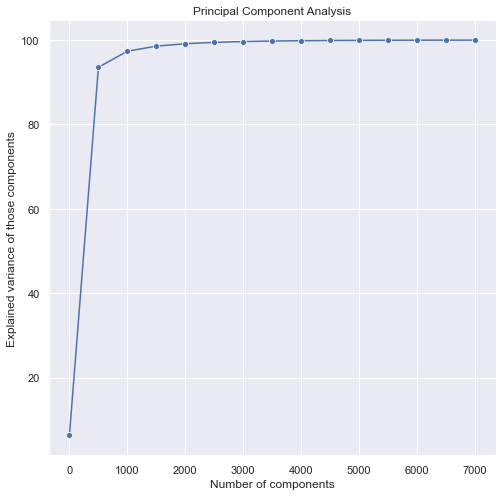

In [60]:
plt.figure(figsize=(8,8))
sns.lineplot(markers=True, data=n,marker="o",dashes=False)
plt.title("Principal Component Analysis")
plt.xlabel("Number of components")
plt.ylabel("Explained variance of those components")
plt.show()

# Encoding the Target Variable

To encode the variables, we incorporate One Hot Encoding since there is no relative ordering between the classes and thereby will not let distance based models to misinterpret some distance relationship.

# Label Encoding

Label Encoding will encode the target variable sequentially under the assumption that there is some ordinal relationship between them. This might mislead the models which use distance metrics like SVMs and KNNs. Hence, we also encode the data using one-hot encoding.

In [28]:
label_encoder = LabelEncoder()
cells_scaled['cellType']= label_encoder.fit_transform(cells_scaled['cellType'])

In [29]:
cells_scaled.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,7216,7217,7218,7219,7220,7221,7222,7223,7224,cellType
16114,-1.547402,-1.809922,-1.960160,-1.853032,-1.315643,0.214569,0.789130,0.748438,0.790441,0.794423,...,0.820116,0.838256,0.808262,0.858044,0.829390,0.859464,0.845564,0.838149,0.843340,6
2626,0.579635,-0.708324,-1.730009,-2.046157,-2.100305,-2.063272,-2.024835,-1.966120,-1.946434,-1.975031,...,-1.337429,-1.343753,-1.644497,-1.875919,-2.084227,-2.195770,-2.282543,-2.332251,-2.406696,2
3972,-0.181622,0.175235,0.630115,0.791107,0.847904,0.859904,0.875595,0.856364,0.847106,0.875359,...,0.813005,0.890211,0.957837,0.950792,0.925579,0.916936,0.899850,0.901683,0.888871,2
1956,-1.436042,-1.495676,-1.412786,-1.142202,-0.905972,-0.806107,-1.009416,-1.290417,-1.511019,-1.582613,...,-1.383901,-1.356129,-1.258557,-1.131277,-0.621973,0.446042,0.754673,0.756128,0.756597,4
13121,-2.061384,-2.130395,-2.236667,-2.315447,-2.477326,-2.655963,-2.679997,-2.636498,-2.397036,-1.187138,...,-0.398687,-0.396084,-0.632165,-0.672124,-0.829321,-1.081608,-1.246985,-1.207929,-0.872683,1
726,0.835154,0.802224,0.849542,0.845018,0.819764,0.814866,0.837844,0.838198,0.875836,0.840589,...,0.768533,0.810314,0.878766,0.819423,-0.179213,-1.173350,-1.454915,-1.592133,-1.538274,0
4314,0.960859,0.959201,0.941267,0.950206,0.955172,0.978412,0.954396,0.985180,0.998480,1.004935,...,0.965922,0.965833,0.949780,0.919971,0.913811,0.949964,0.955615,0.955420,0.959344,5
16334,0.916028,0.918213,0.896930,0.891916,0.877804,0.824169,0.773058,0.839906,0.895047,0.879805,...,0.937886,0.892531,0.939847,0.940041,0.948001,0.882837,0.906070,0.889569,0.837041,6
16274,0.905663,0.910730,0.917713,0.894102,0.588759,-1.567900,-2.954828,-2.564772,-0.609088,0.705512,...,0.971671,0.960774,0.965832,0.932539,0.914337,0.917502,0.918945,0.943080,0.499348,6
14378,0.473748,0.484550,0.495604,0.472091,0.477958,0.487253,0.488005,0.425851,-0.383466,-1.089446,...,0.424063,-0.291106,-0.809442,-0.958263,-1.031021,-1.070792,-1.064024,-1.082684,-1.072880,6


In [104]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,max_depth=15,random_state=0,oob_score=True)

In [105]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, oob_score=True,
                       random_state=0)

In [106]:
print("Accuracy on Train Dataset :",clf.score(X_train, y_train))
print("Accuracy on Test Dataset :",clf.score(X_test, y_test))

Accuracy on Train Dataset : 0.9900534938147777
Accuracy on Test Dataset : 0.7934867394695788


In [107]:
clf.oob_score_

0.7703109327983951

In [97]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=200, random_state=0)

In [98]:
clf.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=200, random_state=0)

In [99]:
print("Accuracy on Train Dataset :",clf.score(X_train, y_train))
print("Accuracy on Test Dataset :",clf.score(X_test, y_test))

Accuracy on Train Dataset : 0.9999164159144099
Accuracy on Test Dataset : 0.8094773790951638


# Test-Train Split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(cells_scaled,
    cells_scaled["cellType"],
    test_size = 0.30,
    train_size=0.70,
    random_state = 0
)

In [31]:
X_train = X_train.drop(["cellType"],axis=1)
X_test = X_test.drop(["cellType"],axis=1)

# Saving the Training data

In [35]:
X_train.to_csv("../data/csv/train.csv")

# Saving the Testing data

In [36]:
X_test.to_csv("../data/csv/test.csv")